In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt


# Data engineering

Se importa el dataset y eliminan las filas con valores nulos.

Las columnas del dataset son las siguientes:
- PassengerId: Identificador del pasajero
- Survived: Indica si el pasajero sobrevivió o no
- Pclass: Clase del pasajero (1, 2, 3)
- Name: Nombre del pasajero
- Sex: Sexo del pasajero
- Age: Edad del pasajero
- SibSp: Número de hermanos o cónyuges a bordo
- Parch: Número de padres o hijos a bordo
- Ticket: Número de ticket
- Fare: Tarifa del pasajero
- Cabin: Cabina del pasajero
- Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [18]:
data = pd.read_csv('train.csv')
data = data.dropna()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Se convierten algunas columnas a valores numéricos.

//TODO: Convertir la columna Age a valores enteros

In [19]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [20]:
# Seleccionar características relevantes
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Creación y entrenamiento de la red

In [22]:
# Convertir las etiquetas a una representación categórica
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


## Evaluación del modelo

In [23]:

# Metricas
#loss, accuracy = model.evaluate(X_test, y_test)
#print(f'Precisión: {accuracy*100:.2f}%')
#print(f'Error: {loss}')




In [24]:
def train_and_evaluate_model(X_train, y_train, X_test, y_test, epochs=50, batch_size=10, hidden_layers=[32, 32], activation='relu', output_activation='sigmoid'):
    # Verificar si las etiquetas ya están en formato categórico
    if y_train.ndim == 1:
        y_train = to_categorical(y_train, num_classes=2)
    if y_test.ndim == 1:
        y_test = to_categorical(y_test, num_classes=2)

    # Crear el modelo
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(X_train.shape[1],)))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
    model.add(Dense(2, activation=output_activation))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Evaluar el modelo
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    return history, loss, accuracy

def plot_results(results):
    for label, result in results.items():
        plt.plot(result['history'].history['val_accuracy'], label=f'{label} - Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

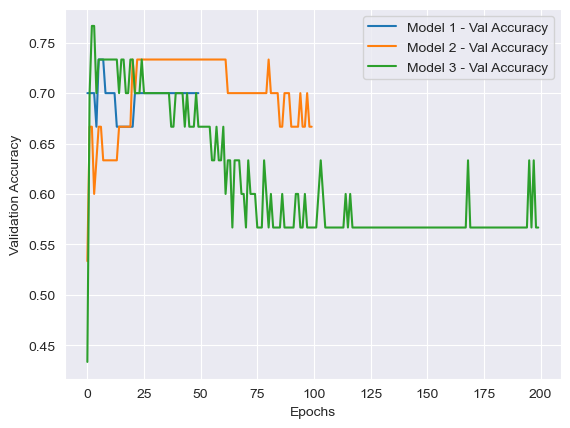

In [25]:

results = {}
params = [
    {'epochs': 50, 'batch_size': 10, 'hidden_layers': [32, 32]},
    {'epochs': 100, 'batch_size': 20, 'hidden_layers': [64, 32]},
    {'epochs': 200, 'batch_size': 10, 'hidden_layers': [32, 32, 16]}
]

for i, param in enumerate(params):
    history, loss, accuracy = train_and_evaluate_model(X_train, y_train, X_test, y_test, **param)
    results[f'Model {i+1}'] = {'history': history, 'loss': loss, 'accuracy': accuracy}

plot_results(results)